In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc


In [2]:
data = pd.read_csv("files/diabetes.csv")

print("Missing values in the dataset:")
print(data.isnull().sum())

print("\nBasic statistics of the dataset:")
print(data.describe())


Missing values in the dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Basic statistics of the dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.00000

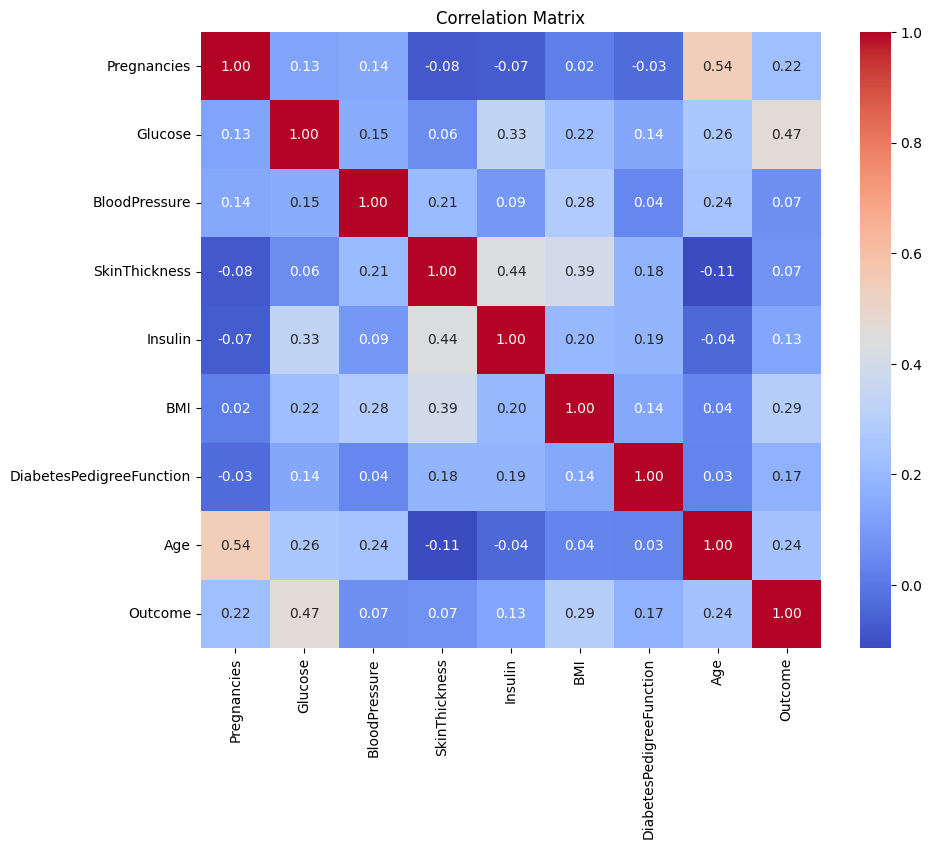

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [6]:
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace:
    data[col] = data[col].replace(0, data[col].median())


In [7]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)


In [11]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


In [12]:
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_log))
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_log))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

Accuracy (Logistic Regression): 0.7662337662337663


In [13]:
print("\nSVM Evaluation:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))



SVM Evaluation:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Accuracy (SVM): 0.7662337662337663


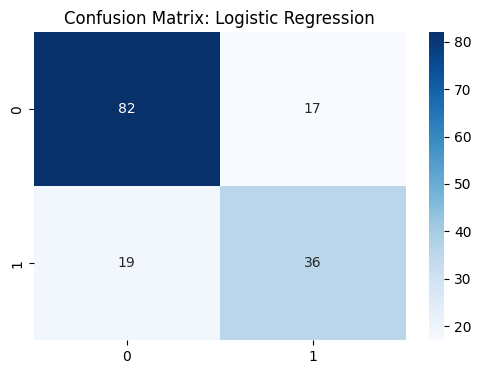

In [14]:
plt.figure(figsize=(6, 4))
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()


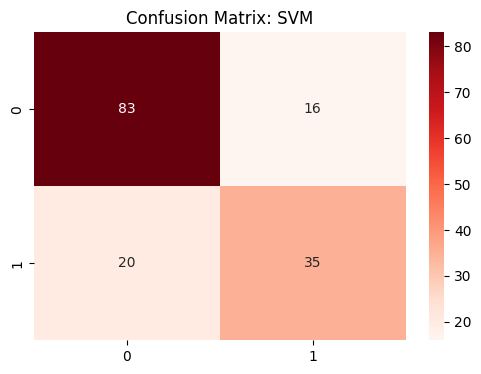

In [15]:
plt.figure(figsize=(6, 4))
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix: SVM")
plt.show()


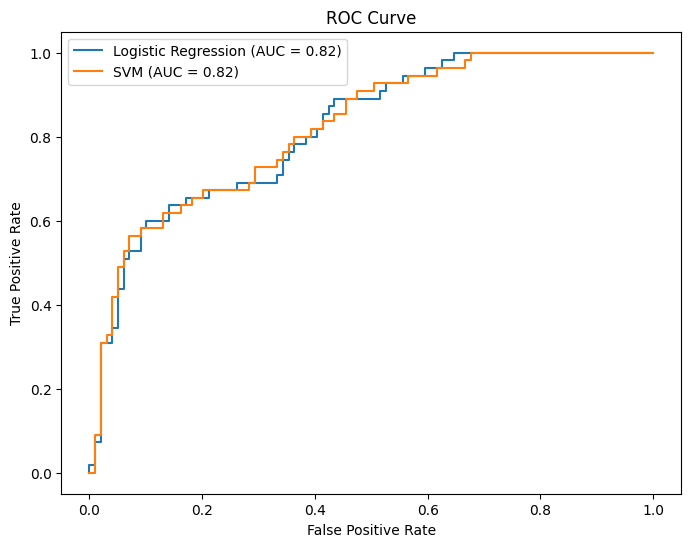

In [16]:
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test))

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc(fpr_log, tpr_log):.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='best')
plt.show()
